In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%pylab inline
%load_ext autoreload
%autoreload 2


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Import Data

In [2]:
crash_df = sns.load_dataset('car_crashes')
print(crash_df)

    total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0    18.8     7.332    5.640          18.048       15.040       784.55   
1    18.1     7.421    4.525          16.290       17.014      1053.48   
2    18.6     6.510    5.208          15.624       17.856       899.47   
3    22.4     4.032    5.824          21.056       21.280       827.34   
4    12.0     4.200    3.360          10.920       10.680       878.41   
5    13.6     5.032    3.808          10.744       12.920       835.50   
6    10.8     4.968    3.888           9.396        8.856      1068.73   
7    16.2     6.156    4.860          14.094       16.038      1137.87   
8     5.9     2.006    1.593           5.900        5.900      1273.89   
9    17.9     3.759    5.191          16.468       16.826      1160.13   
10   15.6     2.964    3.900          14.820       14.508       913.15   
11   17.5     9.450    7.175          14.350       15.225       861.18   
12   15.3     5.508    4.437          

# Distribution Plots
# Distribution Plot

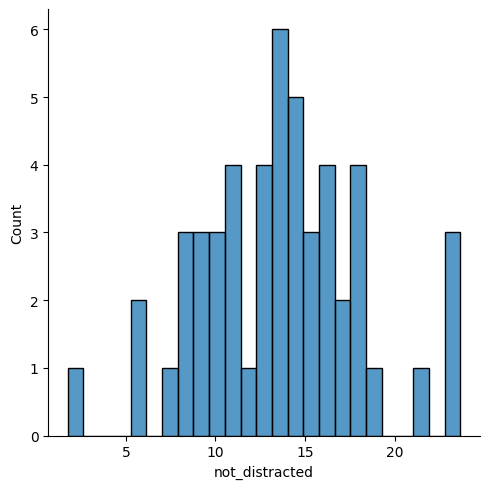

In [3]:
sns.displot(crash_df['not_distracted'], kde=False, bins=25)

# Joint Plot

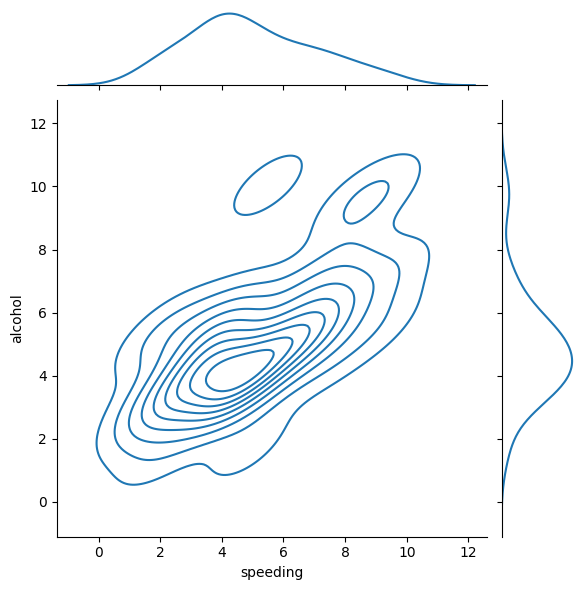

In [4]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='kde')

# KDE Plot

<Axes: xlabel='alcohol', ylabel='Density'>

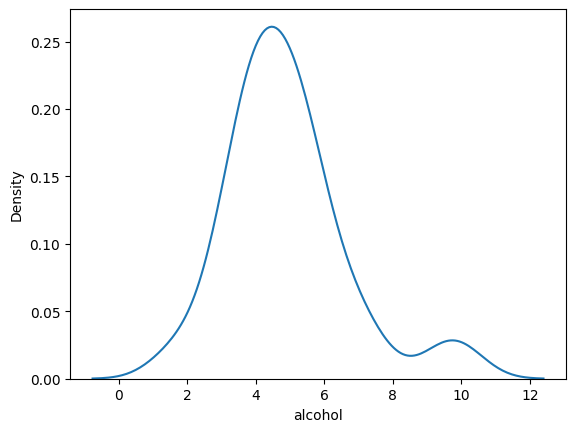

In [5]:
sns.kdeplot(crash_df['alcohol'])

# Pair Plots

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


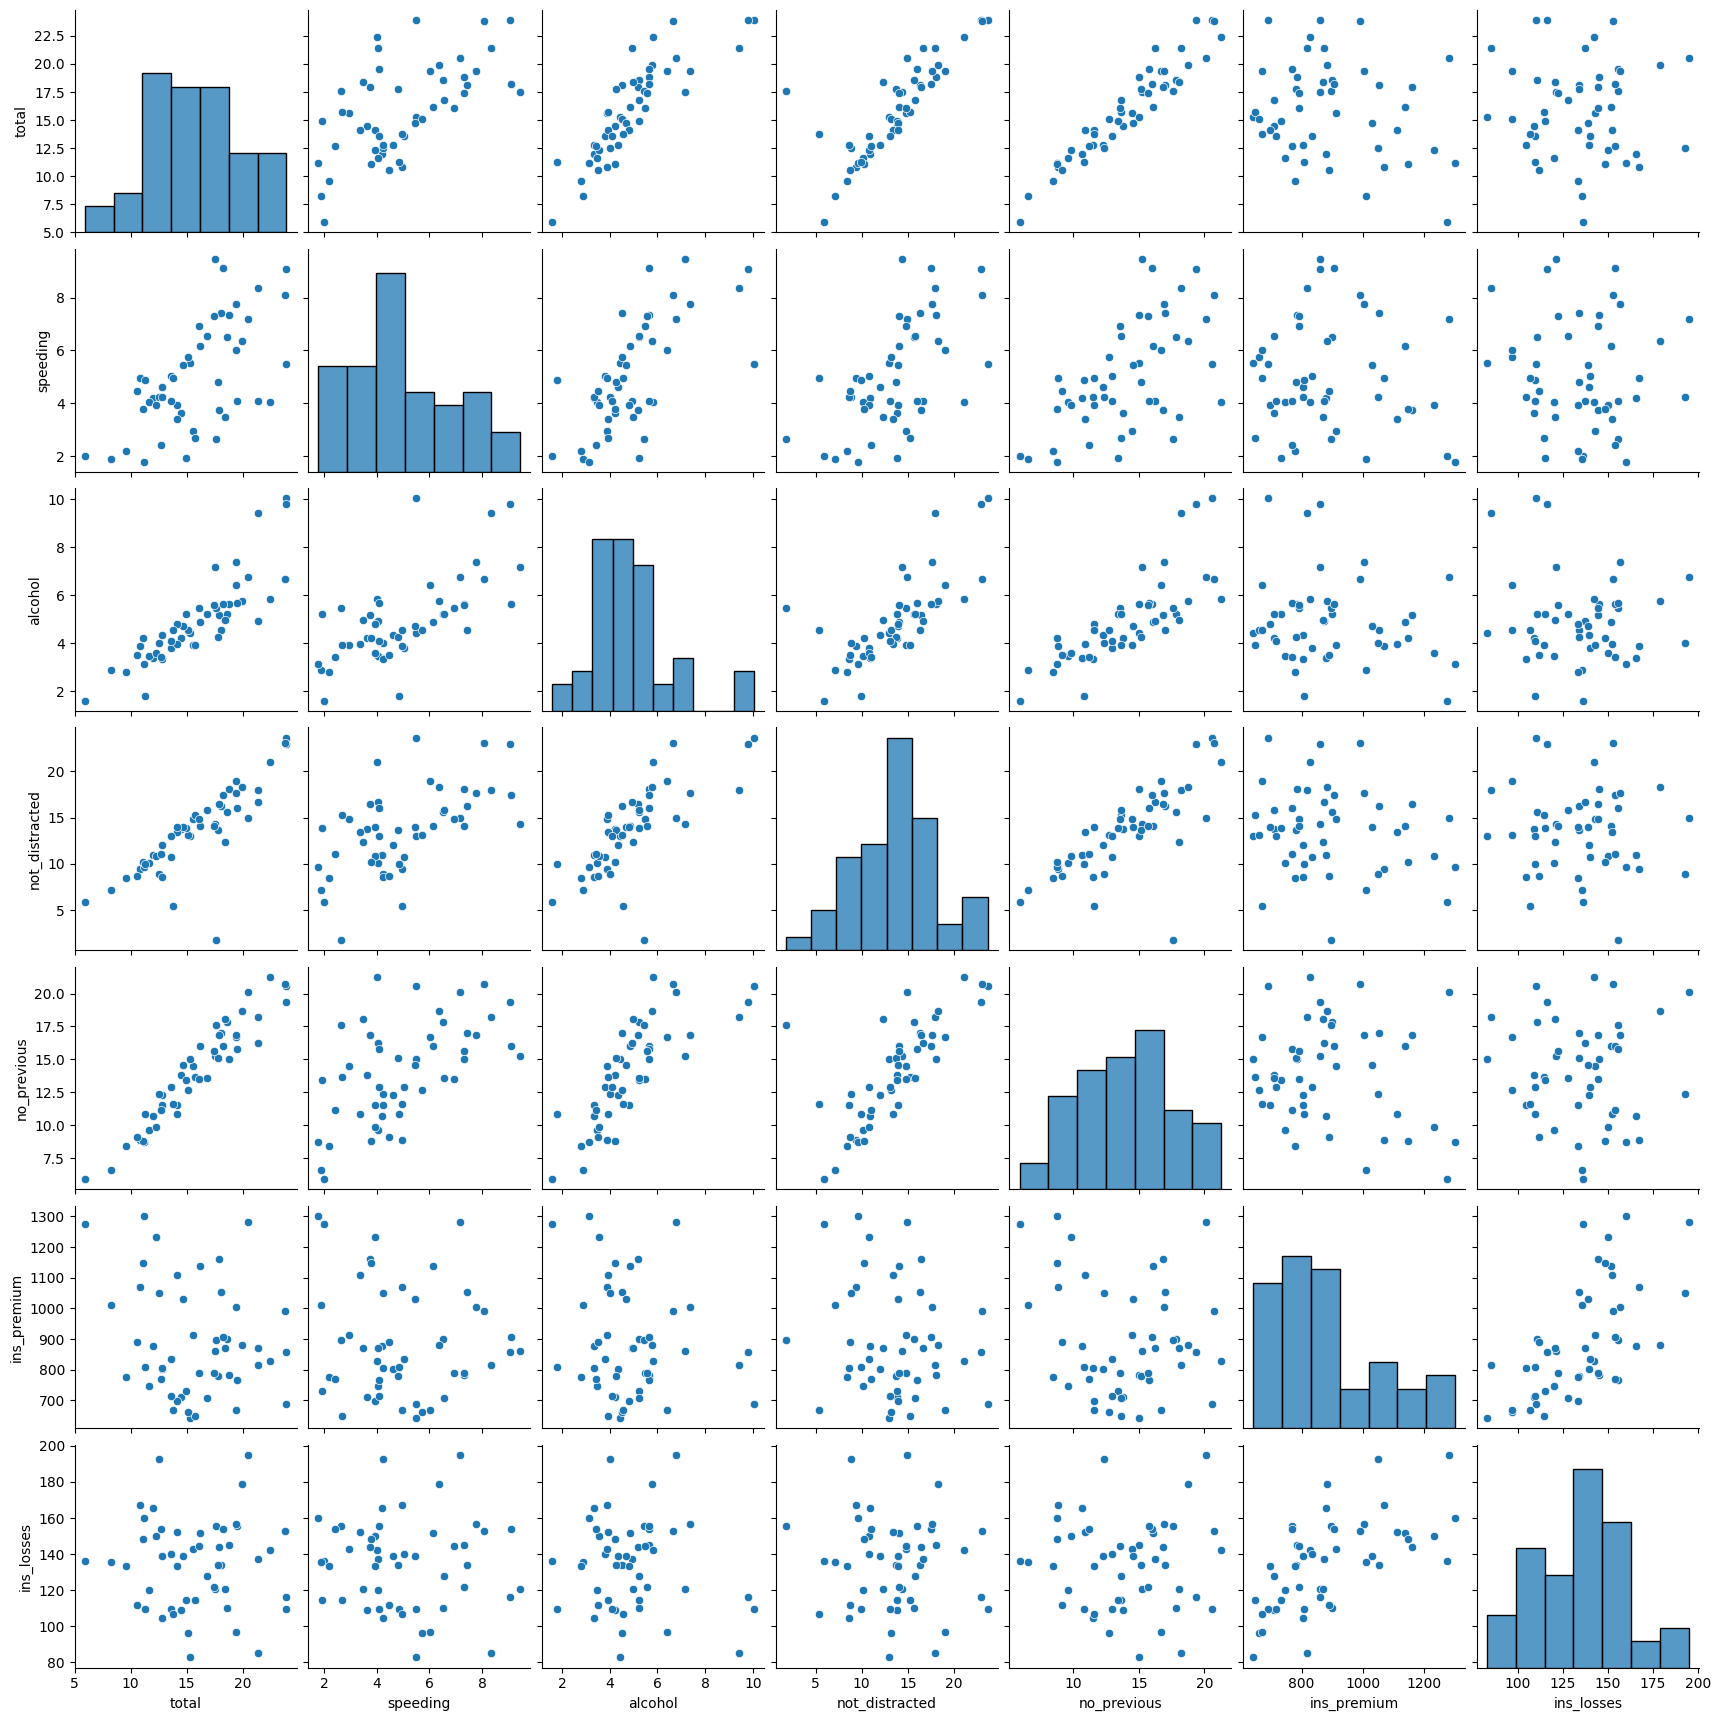

In [6]:
sns.pairplot(crash_df)
tips_df = sns.load_dataset('tips')
print(tips_df)

# Rug Plot

<Axes: xlabel='tip'>

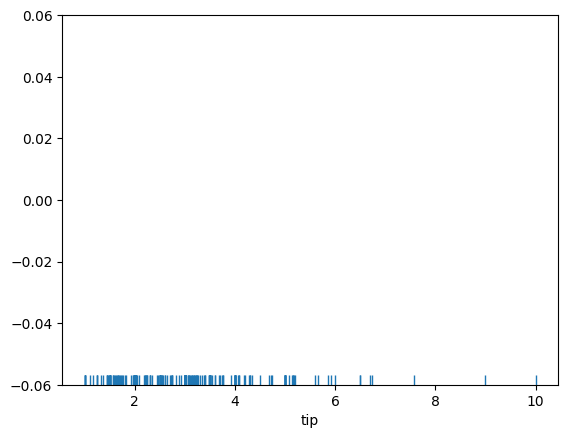

In [7]:
sns.rugplot(tips_df['tip'])


# Styling

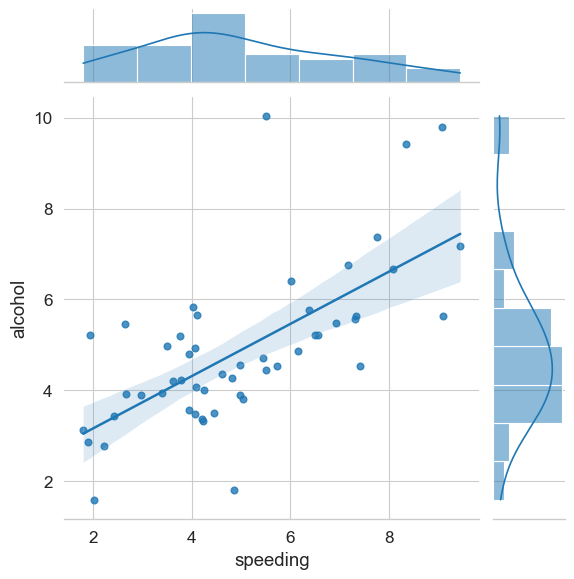

In [8]:
sns.set_style('whitegrid')

plt.Figure(figsize=(8, 4))

sns.set_context('paper', font_scale=1.4)


sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')
sns.despine(left=True)

# Categorical Plots

# Bar Plots

<Axes: xlabel='sex', ylabel='total_bill'>

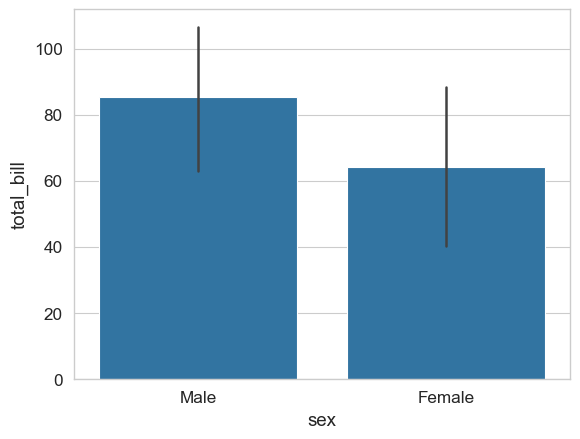

In [9]:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.cov)

# Count Plot

<Axes: xlabel='sex', ylabel='count'>

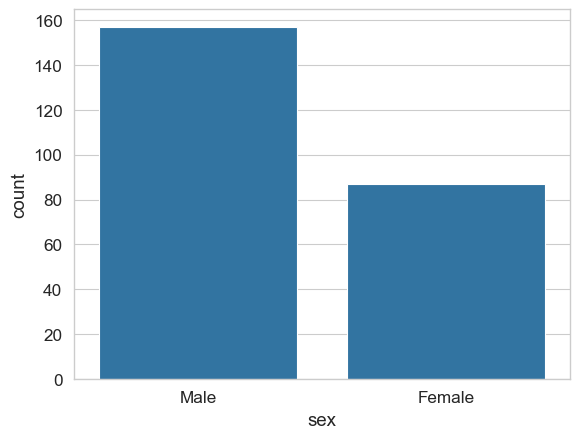

In [10]:
sns.countplot(x='sex', data=tips_df)

# Box Plot

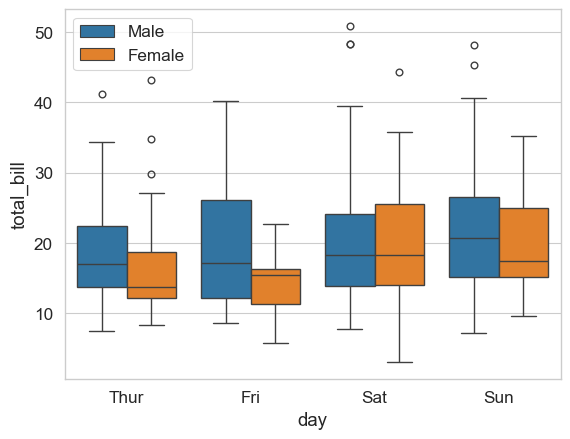

In [11]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')

plt.legend(loc=0)

# Violin Plot 

<Axes: xlabel='day', ylabel='total_bill'>

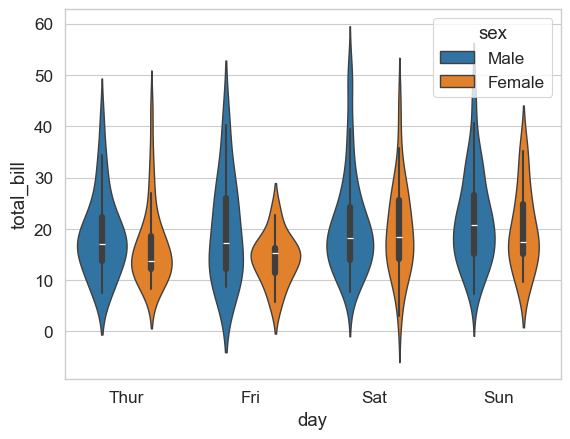

In [12]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex')


# Strip plot 

<Axes: xlabel='day', ylabel='total_bill'>

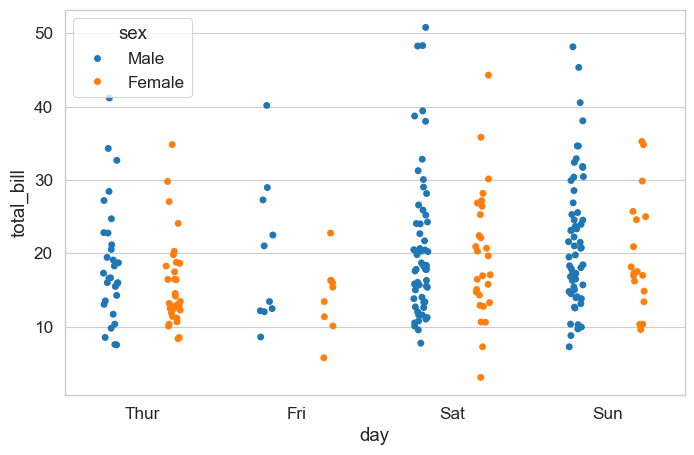

In [13]:
plt.figure(figsize=(8, 5)) 
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True)

# Swarm plot 

<Axes: xlabel='day', ylabel='total_bill'>

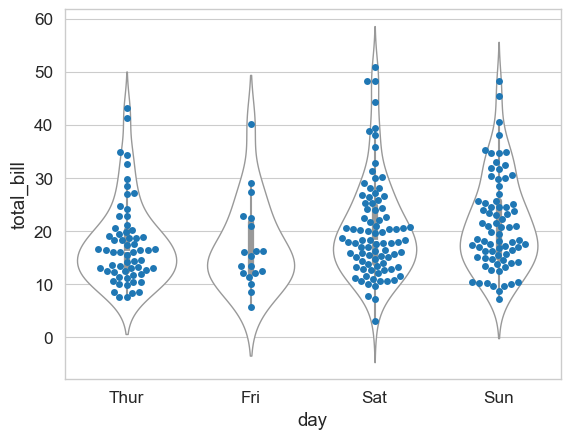

In [14]:
sns.violinplot(x='day', y='total_bill', data=tips_df, color='white')
sns.swarmplot(x='day', y='total_bill', data=tips_df)

# Palettes

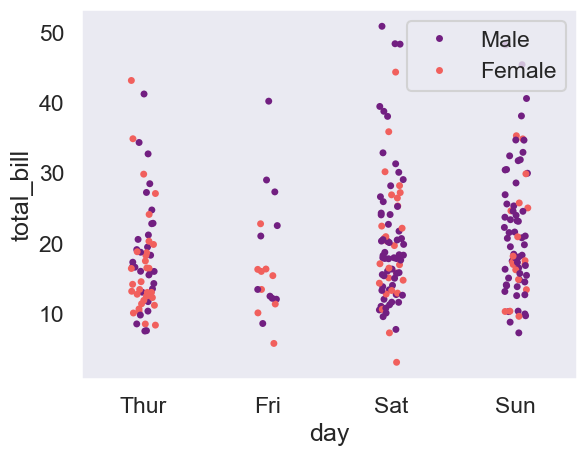

In [15]:
plt.Figure(figsize=(8, 5))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='magma')

# Upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(loc=1)

# Matrix Plots 


# Heatmaps

                   total  speeding   alcohol  not_distracted  no_previous  \
total           1.000000  0.611548  0.852613        0.827560     0.956179   
speeding        0.611548  1.000000  0.669719        0.588010     0.571976   
alcohol         0.852613  0.669719  1.000000        0.732816     0.783520   
not_distracted  0.827560  0.588010  0.732816        1.000000     0.747307   
no_previous     0.956179  0.571976  0.783520        0.747307     1.000000   
ins_premium    -0.199702 -0.077675 -0.170612       -0.174856    -0.156895   
ins_losses     -0.036011 -0.065928 -0.112547       -0.075970    -0.006359   

                ins_premium  ins_losses  
total             -0.199702   -0.036011  
speeding          -0.077675   -0.065928  
alcohol           -0.170612   -0.112547  
not_distracted    -0.174856   -0.075970  
no_previous       -0.156895   -0.006359  
ins_premium        1.000000    0.623116  
ins_losses         0.623116    1.000000  


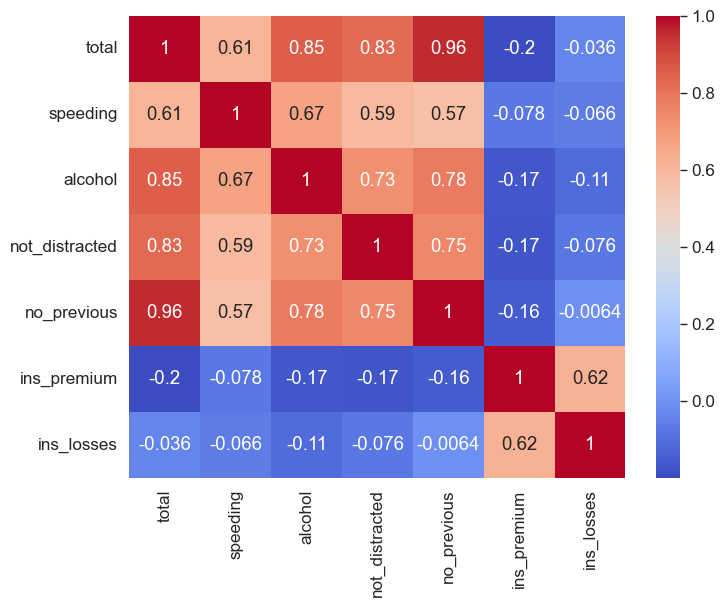

In [17]:
# Select only columns with a numeric data type (int64, float64, etc.)
numeric_crash_df = crash_df.select_dtypes(include=['number'])

# Calculate correlation on the numeric subset

plt.figure(figsize=(8, 6))

sns.set_context("paper", font_scale=1.4)

crash_mx = numeric_crash_df.corr()
sns.heatmap(crash_mx, annot=True, cmap="coolwarm")


print(crash_mx)

<Axes: xlabel='year', ylabel='month'>

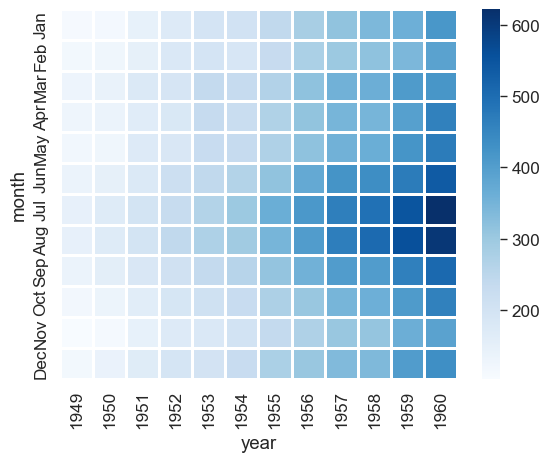

In [18]:
flights = sns.load_dataset('flights')
flights = flights.pivot(index='month', columns='year', values='passengers')
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidths=1)

# Cluster Map

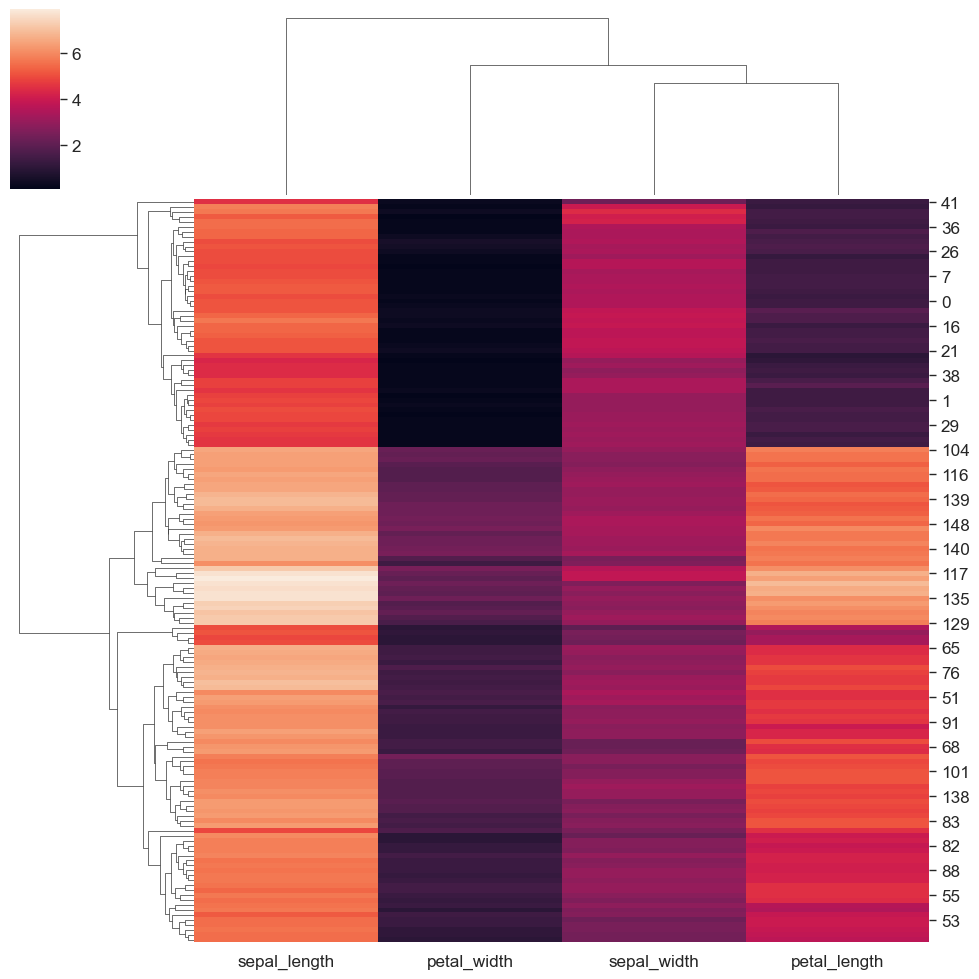

In [19]:
iris = sns.load_dataset('iris')
species = iris.pop('species')
sns.clustermap(iris)


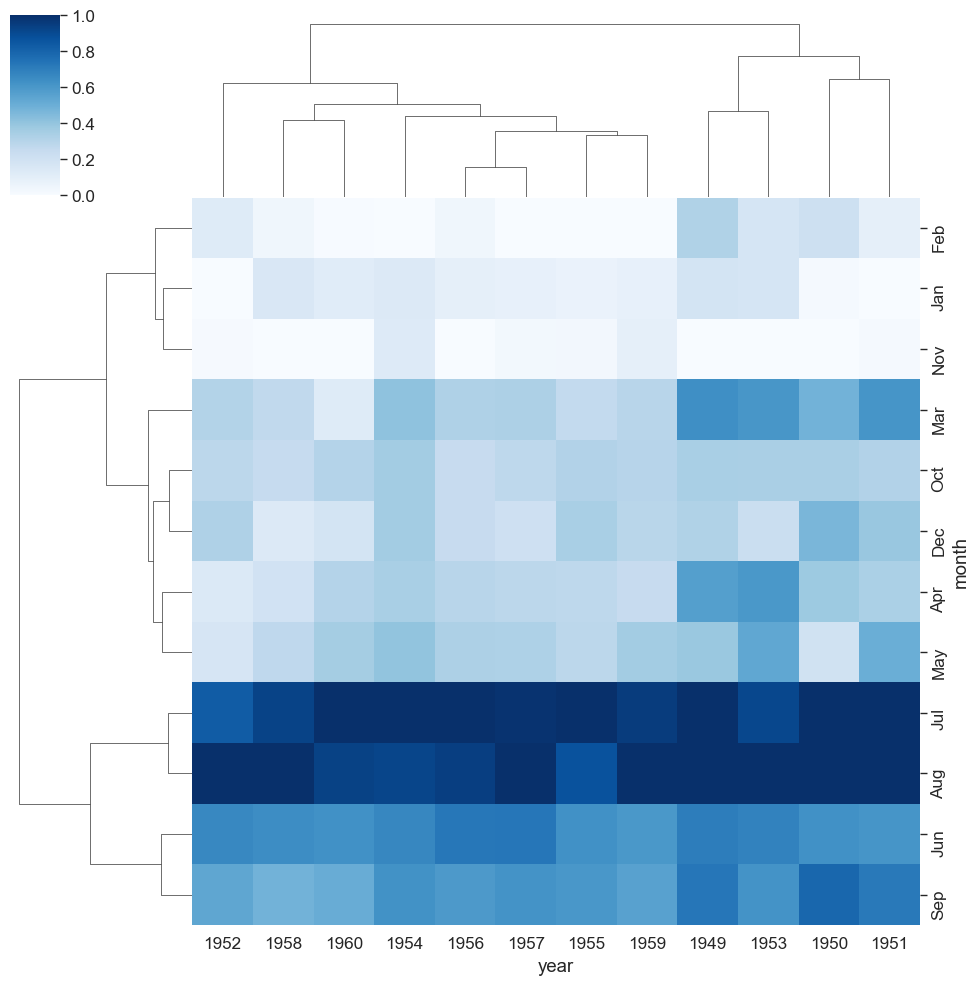

In [20]:
sns.clustermap(flights, cmap='Blues', standard_scale=1)

# PairGrid

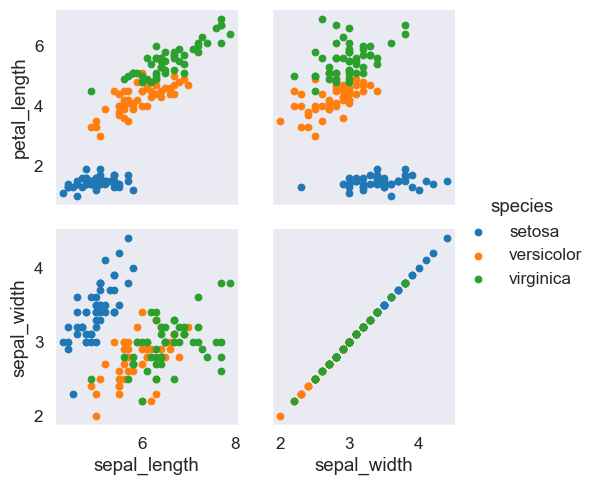

In [24]:
iris = sns.load_dataset('iris')
# iris_g = sns.PairGrid(iris, hue='species')
# iris_g.map(plt.scatter)
# iris_g.map_diag(plt.hist)
# iris_g.map_upper(plt.scatter)
# iris_g.map_offdiag(plt.scatter)
# iris_g.map_lower(sns.kdeplot)

iris_g = sns.PairGrid(iris, hue='species', 
                      x_vars=["sepal_length", "sepal_width"], 
                      y_vars=["petal_length", "sepal_width"])
iris_g.map(plt.scatter)
iris_g.add_legend()



# Facet Grid

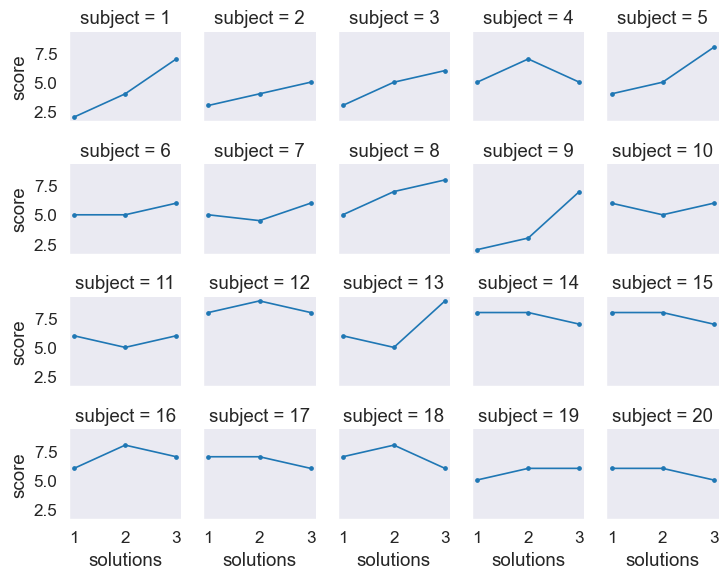

In [36]:
# tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3, 
#                        col_order=['Dinner', 'Lunch'], palette='Set1') 
# tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor='white')
# tips_fg.map(plt.scatter, 'total_bill', 'tip')

# kws = dict(s=50, linewidth=.5, edgecolor='white')
# tips_fg = sns. FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3, 
#                         hue_order=['Yes', 'No'], 
#                         hue_kws=dict(marker=['^', 'v']))
# tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)
att_df = sns.load_dataset('attention')
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

# Regression Plots

In [37]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


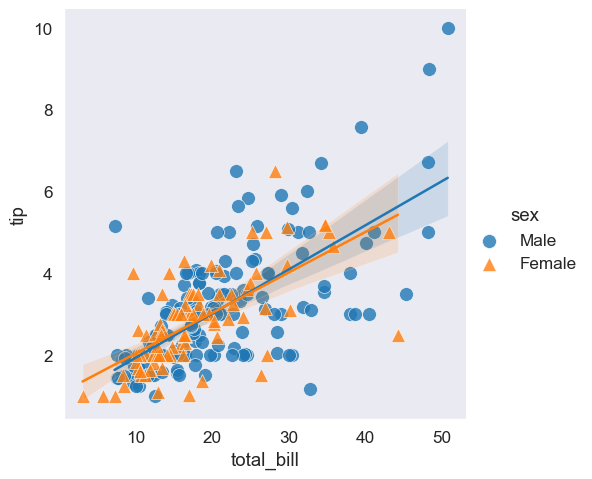

In [42]:
plt.Figure(figsize=(8, 6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'],
            scatter_kws={'s': 100, 'linewidths': 0.5, 'edgecolor': 'white'})

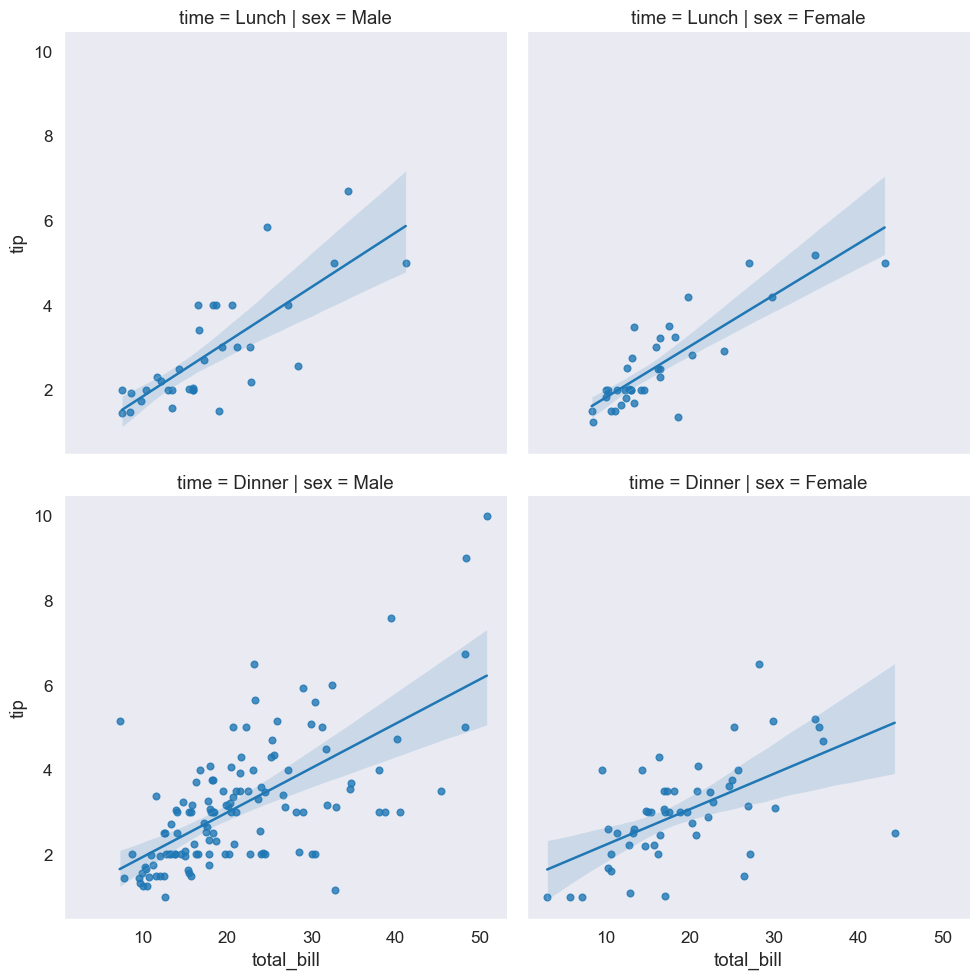

In [44]:
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df, 
           height=5)